#  AVANCE 1: Proyecto Modelación de Sistemas
**Cliente:**  Autoridades institucionales de la Facultad de Ingenieria UdeC

**Objetivo:** Plantear y construir un "Sistema de alerta" basado en datos recopilados, que relacionen las variables de "Region de procedencia" y "Motivos de dificultad percividos", permitiendo identificar cuando haya una alta correlación y de esta forma implementar medidas de apoyo para estos casos.

**Variables a utilizar (Base de datos):**
-Región domicilio (Data_UINN_Facultad)
-Motivos de dificultad percibida (Cuestionario motivacion academica)


Lo primero es cargar las librerias necesarias que requiere nuestro codigo.

In [47]:
#Librerias a utlizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl as oxl
import missingno as msno
print("¡Librerías cargadas exitosamente!")

¡Librerías cargadas exitosamente!


Ahora, cargamos las bases de datos que utilizaremos.

In [48]:
#Leer bases de datos de la manera adecuada, para ambos casos se ocupa el encoding=utf-8 ya que latin-1 falla

#Primera base de datos, notamos que las primeras dos filas no tienen informacion por eso las saltamos luego escogemos la fila 1 como encabezado de las columnas
df_facultad = pd.read_csv(r'\Users\mikae\Downloads\MDS\Data_UINN_Facultad.csv', sep=';',encoding='utf-8',skiprows=2, header=1)

#Segunda base de datos
df_motivacion = pd.read_csv(r'\Users\mikae\Downloads\MDS\Cuestionario motivacion academica.csv', sep=',',encoding='utf-8')

#Tercera base de datos
df_egresados = pd.read_csv(r'\Users\mikae\Downloads\MDS\Perfil de egresados.csv', sep=';',encoding='latin1')

Vision parcial de las bases de datos, algunas filas y todas las columnas.

In [49]:
#Datos base "Data_UINN_Facultad" y "Cuestionario motivacion academica"
display(df_facultad.head())
display(df_motivacion.head())
display(df_egresados.head())

,Cred. Aprob.,Código Carrera Nacional,Año Proceso,Sexo,Grupo Dependencia,Domicilio Región,Preferencia,Selección,Tipo Selección,Puntaje Ponderado,Puntaje Matemáticas,Puntaje Ranking,Puntaje NEM,Puntaje Lenguaje,Puntaje Ciencias
0,0.0,13064.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,3.0,RATIFICADO,1ER. LLAMADO,"583,55",573.0,599.0,599.0,605.0,568.0
1,0.0,13062.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,1.0,RATIFICADO,1ER. LLAMADO,"664,25",634.0,764.0,764.0,685.0,568.0
2,0.0,13064.0,2013.0,MASCULINO,DESCONOCIDO,REGION DEL BIOBIO,3.0,RATIFICADO,1ER. LLAMADO,"571,45",600.0,619.0,599.0,460.0,538.0
3,0.0,13064.0,2013.0,MASCULINO,PARTICULAR SUBVENCIONADO,REGION DEL BIOBIO,3.0,RATIFICADO,1ER. LLAMADO,"585,55",592.0,589.0,580.0,583.0,572.0
4,0.0,13062.0,2013.0,MASCULINO,PARTICULAR SUBVENCIONADO,REGION DEL BIOBIO,1.0,RATIFICADO,1ER. LLAMADO,"615,3",637.0,642.0,599.0,616.0,548.0


,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),Año en que te matriculaste,Género,"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,"Indica, en general, qué tan 4 asistes a clases","Indica, en general, qué tan activamente participas en clases (Ejemplo: Preguntar, comentar, dar ideas, colaborar con compañeros, entre otros).",[Me considero lo suficientemente capacitado/a para enfrentarme con éxito a tareas académicas desafiantes],[Pienso que tengo bastante capacidad para comprender bien y con rapidez contenidos académicos desafiantes],...,"Cuando realicé este curso [Si lo que estaba estudiando parecía sin importancia, me pude convencer a mí mismo/a de mantenerme estudiando]","Cuando realicé este curso [Si lo necesitaba, tuve formas de convencerme de mantenerme trabajando en una tarea difícil]","Cuando realicé este curso [Si estudiar se hacía muy aburrido, pude encontrar un modo de hacerlo entretenido]","Cuando realicé este curso [Incluso si una tarea parecía sin sentido, pude empujarme a mí mismo/a de mantenerme haciéndola hasta terminarla]","Cuando realicé este curso [Si una tarea era difícil, pude encontrar una forma de mantenerme realizándola hasta concluirla]",Cuando realicé este curso [Me empujé a mí mismo/a para mantenerme trabajando incluso si la tarea era realmente aburrida],Cuando realicé este curso [Soy de esas personas que no necesita estudiar para aprobar una asignatura o pasar un semestre desafiante],Cuando realicé este curso [Creo que estoy preparado(a) y bastante capacitado(a) para conseguir muchos éxitos académicos frente a tareas académicas desafiantes],Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto,Ya decidí abandonar mi carrera o cambiarme a otra pronto
0,3309,San pedro de la Paz,2025,Masculino,0,4,4,2,4,3,...,3,4,4,4,4,4,3,4,2,No
1,3310,Temuco,2021,Masculino,8,1,3,4,2,1,...,5,5,5,5,5,5,5,5,3,No
2,3303,Collipulli,2024,Masculino,2,4,4,3,2,3,...,4,3,2,2,4,2,3,5,1,No
3,3311,Cauquenes,2020,Masculino,4,4,5,3,5,5,...,3,5,2,3,2,3,1,5,1,No
4,3310,Magallanes,2021,Masculino,0,4,5,5,1,1,...,4,3,3,4,4,4,1,5,1,No


,AÑO,TOTAL TITULACIONES,TITULACIONES MUJERES POR PROGRAMA,TITULACIONES HOMBRES POR PROGRAMA,TITULACIONES NB E INDEFINIDO POR PROGRAMA,CLASIFICACIÓN INSTITUCIÓN NIVEL 1,CLASIFICACIÓN INSTITUCIÓN NIVEL 2,CLASIFICACIÓN INSTITUCIÓN NIVEL 3,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,...,RANGO DE EDAD 20 A 24 AÑOS,RANGO DE EDAD 25 A 29 AÑOS,RANGO DE EDAD 30 A 34 AÑOS,RANGO DE EDAD 35 A 39 AÑOS,RANGO DE EDAD 40 Y MÁS AÑOS,RANGO DE EDAD SIN INFORMACIÓN,PROMEDIO EDAD PROGRAMA,PROMEDIO EDAD MUJER,PROMEDIO EDAD HOMBRE,PROMEDIO EDAD NB
0,TIT_2024,10,4.0,6.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,...,1.0,NaN,1.0,4.0,4.0,NaN,"38,7","38,5","38,83333333",NaN
1,TIT_2024,13,10.0,3.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,...,1.0,7.0,3.0,2.0,NaN,NaN,29,"28,9","29,33333333",NaN
2,TIT_2024,15,13.0,2.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,...,NaN,NaN,2.0,1.0,12.0,NaN,"45,2","45,69230769",42,NaN
3,TIT_2024,19,15.0,4.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,...,1.0,9.0,7.0,1.0,1.0,NaN,"30,15789474","30,13333333","30,25",NaN
4,TIT_2024,9,5.0,4.0,NaN,Universidades,Universidades Privadas,Universidades Privadas,1,UNIVERSIDAD GABRIELA MISTRAL,...,7.0,2.0,NaN,NaN,NaN,NaN,"23,55555556","23,2",24,NaN


In [50]:
print("--- Info 'Data_UINN_Facultad' ---")
df_facultad.info()

--- Info 'Data_UINN_Facultad' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274 entries, 0 to 4273
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cred. Aprob.             4273 non-null   float64
 1   Código Carrera Nacional  4273 non-null   float64
 2   Año Proceso              4273 non-null   float64
 3   Sexo                     4273 non-null   object 
 4   Grupo Dependencia        4273 non-null   object 
 5   Domicilio Región         4273 non-null   object 
 6   Preferencia              4273 non-null   float64
 7   Selección                4273 non-null   object 
 8   Tipo Selección           4273 non-null   object 
 9   Puntaje Ponderado        4273 non-null   object 
 10  Puntaje Matemáticas      4273 non-null   float64
 11  Puntaje Ranking          4273 non-null   float64
 12  Puntaje NEM              4273 non-null   float64
 13  Puntaje Lenguaje         4273 non-null   flo

In [51]:
print("--- Info 'Cuestionario motivacion academica' ---")
df_motivacion.info()

--- Info 'Cuestionario motivacion academica' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Carrera que estudias actualmente                                                                                                                                 1460 non-null   int64 
 1   Ciudad de origen (desde dónde te viniste a la universidad)                                                                                                       1460 non-null   object
 2   Año en que te matriculaste                                                         

In [52]:
print("--- Info 'Perfil Egresados' ---")
df_egresados.info()

--- Info 'Perfil Egresados' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218566 entries, 0 to 218565
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   AÑO                                        218566 non-null  object 
 1   TOTAL TITULACIONES                         218566 non-null  int64  
 2   TITULACIONES MUJERES POR PROGRAMA          177916 non-null  float64
 3   TITULACIONES HOMBRES POR PROGRAMA          182970 non-null  float64
 4   TITULACIONES NB E INDEFINIDO POR PROGRAMA  5 non-null       float64
 5   CLASIFICACIÓN INSTITUCIÓN NIVEL 1          218566 non-null  object 
 6   CLASIFICACIÓN INSTITUCIÓN NIVEL 2          218566 non-null  object 
 7   CLASIFICACIÓN INSTITUCIÓN NIVEL 3          218566 non-null  object 
 8   CÓDIGO INSTITUCIÓN                         218566 non-null  int64  
 9   NOMBRE INSTITUCIÓN                         218566

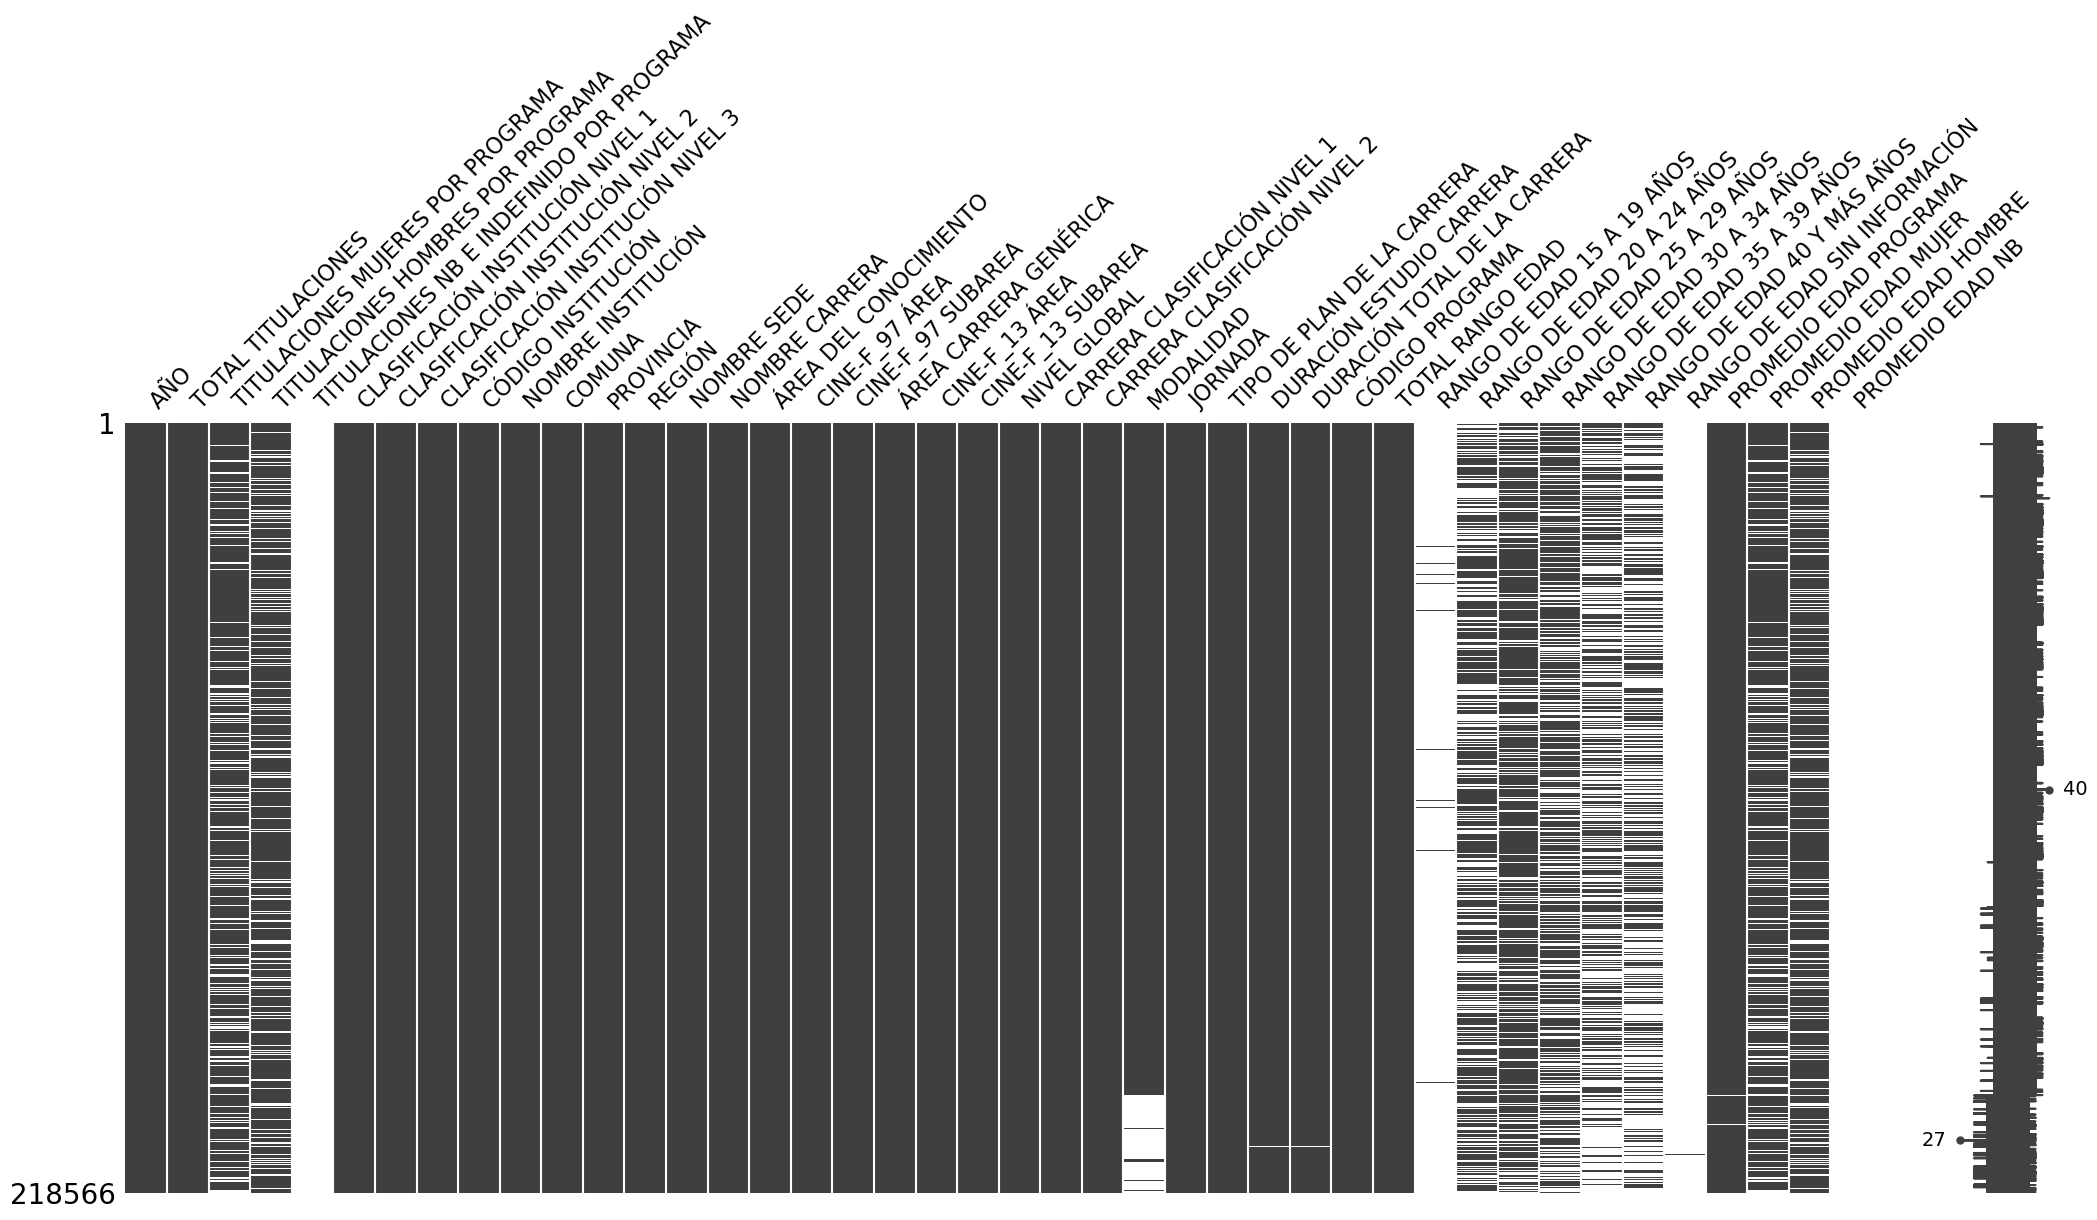

In [53]:
#Usamos missingno para visualizar los datos faltantes
msno.matrix(df_egresados)
plt.show()

In [ ]:
#mostrará cuántas columnas tiene tantos datos faltantes
df_egresados.isna().sum().sort_values()

AÑO                                               0
TOTAL RANGO EDAD                                  0
CÓDIGO PROGRAMA                                   0
TIPO DE PLAN DE LA CARRERA                        0
JORNADA                                           0
CARRERA CLASIFICACIÓN NIVEL 2                     0
CARRERA CLASIFICACIÓN NIVEL 1                     0
NIVEL GLOBAL                                      0
CINE-F_13 ÁREA                                    0
ÁREA CARRERA GENÉRICA                             0
CINE-F_97 SUBAREA                                 0
CINE-F_97 ÁREA                                    0
ÁREA DEL CONOCIMIENTO                             0
NOMBRE CARRERA                                    0
CINE-F_13 SUBAREA                                 0
REGIÓN                                            0
PROVINCIA                                         0
COMUNA                                            0
NOMBRE INSTITUCIÓN                                0
CÓDIGO INSTI

In [62]:
df_egresados.columns


Index(['AÑO', 'TOTAL TITULACIONES', 'TITULACIONES MUJERES POR PROGRAMA',
       'TITULACIONES HOMBRES POR PROGRAMA',
       'TITULACIONES NB E INDEFINIDO POR PROGRAMA',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 1',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 2',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 3', 'CÓDIGO INSTITUCIÓN',
       'NOMBRE INSTITUCIÓN', 'COMUNA', 'PROVINCIA', 'REGIÓN', 'NOMBRE SEDE',
       'NOMBRE CARRERA', 'ÁREA DEL CONOCIMIENTO', 'CINE-F_97 ÁREA',
       'CINE-F_97 SUBAREA', 'ÁREA CARRERA GENÉRICA', 'CINE-F_13 ÁREA',
       'CINE-F_13 SUBAREA', 'NIVEL GLOBAL', 'CARRERA CLASIFICACIÓN NIVEL 1',
       'CARRERA CLASIFICACIÓN NIVEL 2', 'MODALIDAD', 'JORNADA',
       'TIPO DE PLAN DE LA CARRERA', 'DURACIÓN ESTUDIO CARRERA',
       'DURACIÓN TOTAL DE LA CARRERA', 'CÓDIGO PROGRAMA', 'TOTAL RANGO EDAD',
       'RANGO DE EDAD 15 A 19 AÑOS', 'RANGO DE EDAD 20 A 24 AÑOS',
       'RANGO DE EDAD 25 A 29 AÑOS', 'RANGO DE EDAD 30 A 34 AÑOS',
       'RANGO DE EDAD 35 A 39 AÑOS', 'RANGO

En las ultimas celdas se verificó y reviso el contenido de las bases de datos, si estan siendo correctamente leidas o se observan valores nulos en alguna columna, lo cual ocurre en la tercera base de datos y por tanto lo visualizamos para un mejor entendimiento y dar cuenta de la magnitud de datos faltantes. 
_____________________________________________________________

LIMPIEZA DE DATOS: Notar que en la primera base de datos tenemos los códigos nacionales de la carrera, y en la segunda base tenemos los códigos UDEC, por tanto procedemos a que ambos DataFrames trabajen con el mismo, en este caso dejamos el Código UdeC.

In [60]:
#Cambiamos el dtype de la variable
df_facultad['Código Carrera Nacional'] = df_facultad['Código Carrera Nacional'].astype('Int64')

#Diccionario de equivalencias codigos Ingenierias Civiles (Nacionales->UdeC)
cod_udec = {13072:3309, #Industrial
            13069:3310, #Civil
            13070:3311, #Eléctrica
            13071:3318, #Electrónica
            13019:3303, #Comercial
            13073:3319} #Informática


#filtramos las filas que tienen codigos distintos a los del diccionario
df_facultad = df_facultad[df_facultad['Código Carrera Nacional'].isin(cod_udec)]

#Creamos la nueva columna de codigos udec
df_facultad['Código UdeC'] = df_facultad['Código Carrera Nacional'].map(cod_udec)

#y eliminamos la columna de codigo nacional
df_facultad.drop(columns=['Código Carrera Nacional'], inplace=True)

#verificamos los cambios
display(df_facultad.head())

KeyError: 'Código Carrera Nacional'

In [ ]:
#renombramos la columna para luego hacer el merge
df_motivacion.rename(columns={'Carrera que estudias actualmente': 'Código UdeC'}, inplace=True)

#verificamos que los códigos sean válidos 
codigos_udec = [3309, 3310, 3311, 3318, 3303, 3319]

#filtrar solo las filas que pertenecen a esos códigos
df_motivacion = df_motivacion[df_motivacion['Código UdeC'].isin(codigos_udec)]

#se verifican los cambios
display(df_motivacion.head())
df_motivacion.info()

,Código UdeC,Ciudad de origen (desde dónde te viniste a la universidad),Año en que te matriculaste,Género,"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,"Indica, en general, qué tan 4 asistes a clases","Indica, en general, qué tan activamente participas en clases (Ejemplo: Preguntar, comentar, dar ideas, colaborar con compañeros, entre otros).",[Me considero lo suficientemente capacitado/a para enfrentarme con éxito a tareas académicas desafiantes],[Pienso que tengo bastante capacidad para comprender bien y con rapidez contenidos académicos desafiantes],...,"Cuando realicé este curso [Si lo que estaba estudiando parecía sin importancia, me pude convencer a mí mismo/a de mantenerme estudiando]","Cuando realicé este curso [Si lo necesitaba, tuve formas de convencerme de mantenerme trabajando en una tarea difícil]","Cuando realicé este curso [Si estudiar se hacía muy aburrido, pude encontrar un modo de hacerlo entretenido]","Cuando realicé este curso [Incluso si una tarea parecía sin sentido, pude empujarme a mí mismo/a de mantenerme haciéndola hasta terminarla]","Cuando realicé este curso [Si una tarea era difícil, pude encontrar una forma de mantenerme realizándola hasta concluirla]",Cuando realicé este curso [Me empujé a mí mismo/a para mantenerme trabajando incluso si la tarea era realmente aburrida],Cuando realicé este curso [Soy de esas personas que no necesita estudiar para aprobar una asignatura o pasar un semestre desafiante],Cuando realicé este curso [Creo que estoy preparado(a) y bastante capacitado(a) para conseguir muchos éxitos académicos frente a tareas académicas desafiantes],Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto,Ya decidí abandonar mi carrera o cambiarme a otra pronto
0,3309,San pedro de la Paz,2025,Masculino,0,4,4,2,4,3,...,3,4,4,4,4,4,3,4,2,No
1,3310,Temuco,2021,Masculino,8,1,3,4,2,1,...,5,5,5,5,5,5,5,5,3,No
2,3303,Collipulli,2024,Masculino,2,4,4,3,2,3,...,4,3,2,2,4,2,3,5,1,No
3,3311,Cauquenes,2020,Masculino,4,4,5,3,5,5,...,3,5,2,3,2,3,1,5,1,No
4,3310,Magallanes,2021,Masculino,0,4,5,5,1,1,...,4,3,3,4,4,4,1,5,1,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Código UdeC                                                                                                                                                      1460 non-null   int64 
 1   Ciudad de origen (desde dónde te viniste a la universidad)                                                                                                       1460 non-null   object
 2   Año en que te matriculaste                                                                                                          

In [ ]:
df_completo = pd.merge(df_facultad, df_motivacion, on='Código UdeC', how='inner')
print("¡Merge completado! Ahora tenemos un solo DataFrame.")
display(df_completo.head())

# Revisamos la información del DataFrame final
print("\n--- Info del DataFrame 'df_completo' ---")
df_completo.info()

¡Merge completado! Ahora tenemos un solo DataFrame.


,Cred. Aprob.,Año Proceso,Sexo,Grupo Dependencia,Domicilio Región,Preferencia,Selección,Tipo Selección,Puntaje Ponderado,Puntaje Matemáticas,...,"Cuando realicé este curso [Si lo que estaba estudiando parecía sin importancia, me pude convencer a mí mismo/a de mantenerme estudiando]","Cuando realicé este curso [Si lo necesitaba, tuve formas de convencerme de mantenerme trabajando en una tarea difícil]","Cuando realicé este curso [Si estudiar se hacía muy aburrido, pude encontrar un modo de hacerlo entretenido]","Cuando realicé este curso [Incluso si una tarea parecía sin sentido, pude empujarme a mí mismo/a de mantenerme haciéndola hasta terminarla]","Cuando realicé este curso [Si una tarea era difícil, pude encontrar una forma de mantenerme realizándola hasta concluirla]",Cuando realicé este curso [Me empujé a mí mismo/a para mantenerme trabajando incluso si la tarea era realmente aburrida],Cuando realicé este curso [Soy de esas personas que no necesita estudiar para aprobar una asignatura o pasar un semestre desafiante],Cuando realicé este curso [Creo que estoy preparado(a) y bastante capacitado(a) para conseguir muchos éxitos académicos frente a tareas académicas desafiantes],Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto,Ya decidí abandonar mi carrera o cambiarme a otra pronto
0,0.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,4.0,RATIFICADO,1ER. LLAMADO,"647,35",630.0,...,4,4,3,3,3,4,4,3,1,No
1,0.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,4.0,RATIFICADO,1ER. LLAMADO,"647,35",630.0,...,4,3,2,2,3,4,2,3,1,No
2,0.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,4.0,RATIFICADO,1ER. LLAMADO,"647,35",630.0,...,1,4,1,1,1,5,2,5,3,No
3,0.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,4.0,RATIFICADO,1ER. LLAMADO,"647,35",630.0,...,1,1,1,1,1,1,1,1,3,No
4,0.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,4.0,RATIFICADO,1ER. LLAMADO,"647,35",630.0,...,1,4,3,3,4,4,2,3,1,No



--- Info del DataFrame 'df_completo' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405581 entries, 0 to 405580
Data columns (total 87 columns):
 #   Column                                                                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                                                                           --------------   -----  
 0   Cred. Aprob.                                                                                                                                                     405581 non-null  float64
 1   Año Proceso                                                                                                                                                      405581 non-null  float64
 2   Sexo                                                                          

**Relación visual de las variables a utilizar**

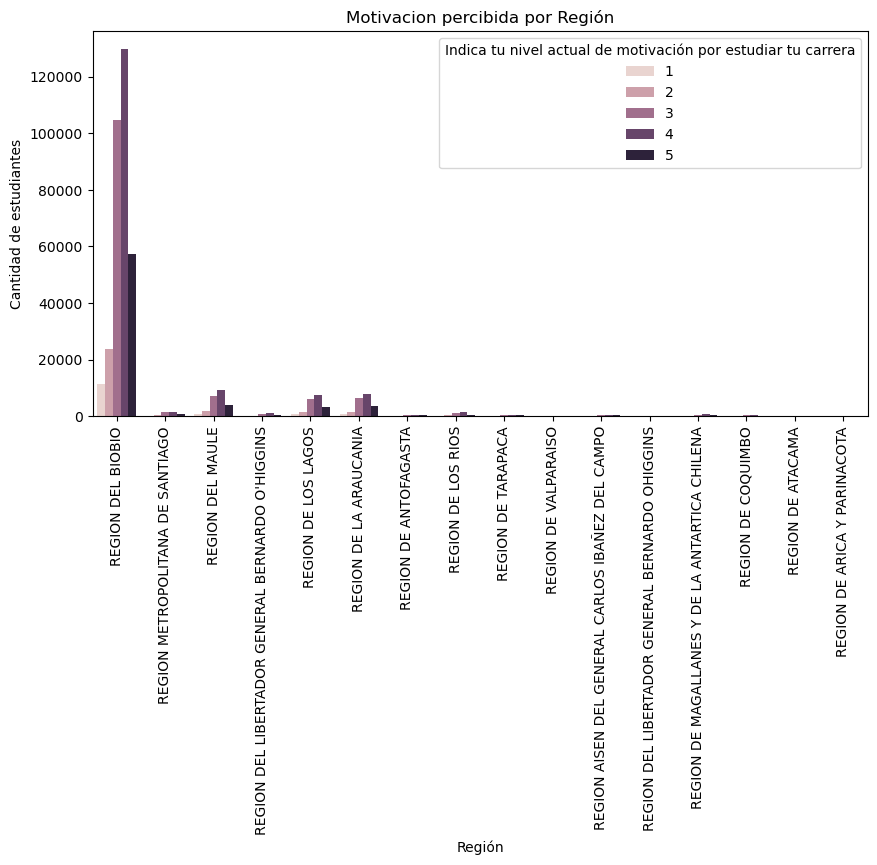

In [ ]:
#generamos el grafico
plt.figure(figsize=(10, 5))
sns.countplot(data=df_completo, x='Domicilio Región', hue='Indica tu nivel actual de motivación por estudiar tu carrera')
plt.xticks(rotation=90)
plt.xlabel('Región')
plt.ylabel('Cantidad de estudiantes')
plt.title('Motivacion percibida por Región')
plt.show()